<a href="https://colab.research.google.com/github/juancaalcaraz/practicaML/blob/main/Modelo_R_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresión logística

>   La regresión logística es un modelo de clasificación que funciona muy bien en clases separables lineales. Este modelo también puede utilizarce para la clasificacion multiclase mediante la tecnica OvR.



## La regresión logística es un modelo basado en probabilidad condicional. La probabilidad de que ocurra un evento concreto se puede calcular como $$p/1-p$$
## donde p significa la probabilidad del evento positivo y 1 significa certeza.
## El evento positivo es el evento que queremos predecir, podemos penasr el evento positivo como una etiqueta de clase y=1.
## También podemos definir la función logit que es el logaritmo de la razon de probabilidades: $$logit(p)= log(p/1-p)$$
## la función logit toma como entrada valores del rango del 0 al 1, y los transforma en valores de todo el rango de números reales.
## Ahora, lo que realmente nos interesa es predecir la probabilidad de que una determinada muestra pertenesca a una clase concreta, que es la inversa a la función logit, la función sigmoide logística llamada abreviadamente función sigmoide. $$\phi(Z)=\frac {1}{1+e^{-z}}$$

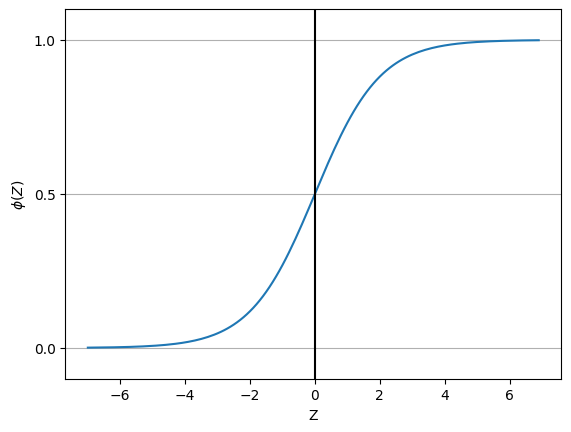

In [1]:
#Vamos a mostrar gráficamente la funcion sigmoide para el rango 7, -7
import matplotlib.pyplot as plt
import numpy as np
def sigmoide(z):
  return 1.0 / (1.0+np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoide(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('Z')
plt.ylabel('$\phi (Z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

## Podemos ver que $\phi (Z)$ se aproxima a 1 si Z se dirige al infinito postivo ya que e$^{-z}$ pasa a ser muy pequeño para los valores de Z. De igual manera, $\phi (Z)$ se dirige a 0 cuando Z se aproxima al infinito negativo. La función sigmoide toma valores de números reales y devuelve un número del rango[0,1] y consta de una interseccion en $\phi(Z)=0.5$.     

## La salida de la función sigmoide se interpreta como la probabilidad de que una muestra pertenesca a una clase en concreta dada sus caracteristicas. $\phi(Z)=P(y=1|x;w)$ Donde $x$ son las caracteristicas parametrizadas por los pesos $w$.

# Creando un diagrama que ilustra el coste de clasificación.

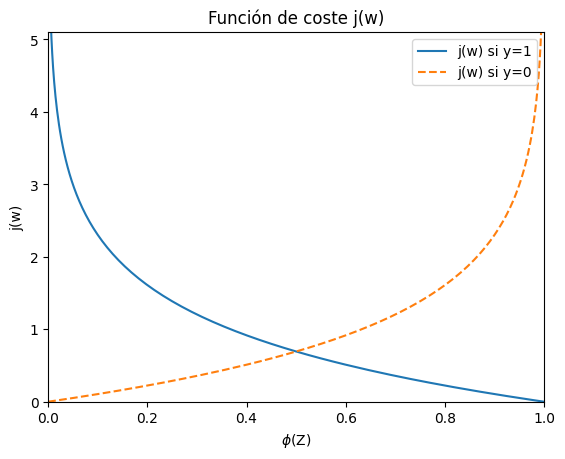

In [2]:
def cost_1(z):
  return -np.log(sigmoide(z))

def cost_0(z):
  return -np.log(1-sigmoide(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoide(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='j(w) si y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='j(w) si y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0,1])
plt.title('Función de coste j(w)')
plt.xlabel('$\phi $(Z)')
plt.ylabel('j(w)')
plt.legend(loc='best')
plt.show()

## Podemos concluir con el diagrama anterior que si la clasificaion de una etiqueta es erronea el coste tiende a infinito, penalizamos las predicciones erroneas con un coste cada ves mayor. En caso contrario, si la clasificación $(y=0 | y=1)$es correcta, el coste se aproxima a cero.

# Convirtiendo el algoritmo adaline en uno de Regresión logística.

## Para lograr esto vamos a cambiar la función de activación lineal por la activación sigmoide y cambiar la función de umbral para retornar números del rango[0,1] en lugar de las etiquetas -1 y 1.

In [3]:
class RegresionLogisticaSG(object):
  """ Clasificador Regrsión logística usando gradiente descendiente
  parametros
  ------------
  eta : float
    tasa de aprendizage (enter 0.0 y 1.0)
  n_iter: int
    pasos por el conjunto de datos de entrenamiento
  random_state: int
    generador de numero de la semilla aleatoria para inicializar los pesos.

  Atributos
  -----------
  w_ : 1d-array
    pesos despues del ajuste.
  cost_ : list
    suma de errores cuadraticos valor de la función de coste en cada epoca.
  """
  def __init__(self, eta=0.05, n_iter=100, random_state=1):
    self.eta=eta
    self.n_iter=n_iter
    self.random_state= random_state
  def net_input(self, X):
    """"Calcual la siguiente entrada"""
    return np.dot(X, self.w_[1:]) + self.w_[0]
  def activation(self, z):
    """Calcula la activacion sigmoide logistica"""
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
  def predict(self, X):
    """Retorna la etiqueta de clase despues del paso de la unidad"""
    return np.where(self.net_input(X)>= 0.0, 1, 0)
      #equivalente a
      #return np.where(self.activation(self.net_input(X))>= 0.5, 1,0)
  # En el libro el metodo fit es el primero en declararse
  # Pero a mi me da error si no declaro los otros metodos antes.
  def fit(self, X, y):
    """ Ajustar los datos de entrenamiento.
    parametros
    -----------
    X: {Array-like} shape=[n_samples, n_features]
    Vectores de entrenamiento donde n_samples es el numero de muestras y
    n_features es el numero de caracteristicas.
    y : array-like
    valores objetivos
    retorna
    --------
    self : object

    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ =rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      net_input= self.net_input(X)
      output = self.activation(net_input)
      errors= (y-output)
      self.w_[1:]+= self.eta * X.T.dot(errors)
      self.w_[0] += self.eta* errors.sum()
      # Ahora calculamos el coste logistico en lugar de la suma de cuadrados.
      cost = (-y.dot(np.log(output)) -((1-y).dot(np.log(1-output))))
      self.cost_.append(cost)
    return self

In [4]:
#Vamos a cargar el dataset flor iris para comprobar nuestro clasificador de regresion.
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Etiquetas de clases: ', np.unique(y))

Etiquetas de clases:  [0 1 2]


In [5]:
# vamos a dividir el dataset en conjuntos de datos de prueba y entrenamiento.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

In [6]:
# Cuando Usamos regresion logistica es para tareas de clasificacion binaria.
# por eso, vamos a tener en cuenta solo las clases 0 y 1.
X1_train_subset = X_train[(y_train==0)|(y_train==1)]
y_train_subset = y_train[(y_train==0)|(y_train==1)]


In [7]:
lrgd = RegresionLogisticaSG(eta=0.5, n_iter=1000, random_state=1)
lrgd.fit(X1_train_subset, y_train_subset)

<ipython-input-3-fe5066692312>:60: RuntimeWarning: divide by zero encountered in log
  cost = (-y.dot(np.log(output)) -((1-y).dot(np.log(1-output))))


## Vamos a utilizar la función de regiones de decision.

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
  #definir un generador de marcadores
  marcadores = ("s","x","o","v","*")
  colores = ('red','blue','lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colores[:len(np.unique(y))])

  #representar la superficie de desicion
  x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max()+1
  x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max()+1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution)
                              )
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha= 0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  #representar muestras de clase.
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
               y=X[y == cl, 1],
               alpha= 0.8,
               c=colores[idx],
               marker=marcadores[idx],
               label= cl
               )
def plot_decision_regionsNew(X, y, classifier, test_idx=None, resolution = 0.02):
  #definir un generador de marcadores y mapa de colores.
  marcadores = ("s","x","o","^","v")
  colores = ('red','blue','lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colores[:len(np.unique(y))])

  #representar la superficie de desicion
  x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max()+1
  x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max()+1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution)
                              )
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha= 0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  #representar muestras de clase.
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
               y=X[y == cl, 1],
               alpha= 0.8,
               c=colores[idx],
               marker=marcadores[idx],
               label= cl,
               edgecolors= 'black'
               )
  # Destaca las muestras de prueba
  if test_idx:
    #representa todas las muestras.
    x_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(x_test[:, 0], x_test[:, 1], c='#f1ffff', edgecolors='black', alpha=1.0,
                linewidths=1, marker='o', s=100, label='test set')

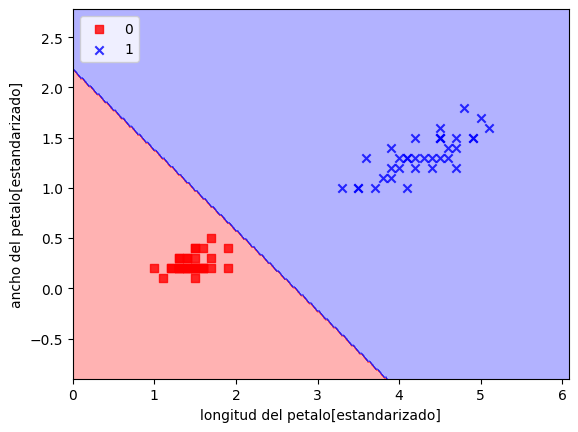

In [9]:
plot_decision_regions(X=X1_train_subset, y=y_train_subset, classifier=lrgd)
plt.xlabel('longitud del petalo[estandarizado]')
plt.ylabel('ancho del petalo[estandarizado]')
plt.legend(loc='upper left')
plt.show()

# Vamos a entrenar un modelo de Regresión logística con ScikitLearn.

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)


In [11]:
#normalizamos los datos
from sklearn.preprocessing import StandardScaler
estandar_escaler = StandardScaler()
estandar_escaler.fit(X_train)
X_train_std = estandar_escaler.transform(X_train)
X_test_std = estandar_escaler.transform(X_test)

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [13]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, random_state=1)

<ipython-input-8-d24951c736ac>:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


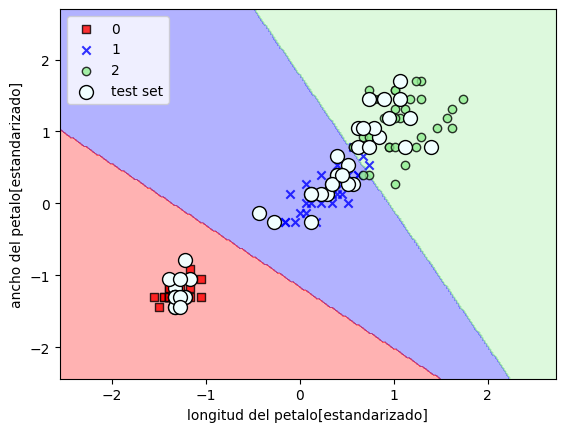

In [14]:
plot_decision_regionsNew(X_combined_std, y_combined, classifier=lr, test_idx= range(105,150))
plt.xlabel('longitud del petalo[estandarizado]')
plt.ylabel('ancho del petalo[estandarizado]')
plt.legend(loc='upper left')
plt.show()

In [18]:
# Vamos a calcular la probabilidad de pertenencia de una clase.
lr.predict_proba(X_test_std[:3, :])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

In [19]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [20]:
# Para una sola muestra
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])